Convert CSV to Dataframe

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.keras
import tensorflow as tf
import seaborn as sns
import IPython
import IPython.display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/ZIllowData/train_2017.csv', low_memory=False, parse_dates=["transactiondate"])
df_train

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01
...,...,...,...
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21


In [ ]:
df_properties = pd.read_csv('/content/drive/My Drive/ZIllowData/properties_2017.csv', low_memory=False)
df_properties

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_properties = df_properties.fillna(-1.0)
df_properties

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,34144442.0,-118654084.0,85768.0,-1.0,-1.0,-1.0,-1.0,-1.0,010D,269.0,-1,6.037800e+07,37688.0,3101.0,-1.0,96337.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,9.0,2015.0,9.0,-1.00,-1,-1.0,-1.0
1,10759547,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,34140430.0,-118625364.0,4083.0,-1.0,-1.0,-1.0,-1.0,-1.0,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,-1.0,96337.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,27516.0,2015.0,27516.0,-1.00,-1,-1.0,-1.0
2,10843547,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,73026.0,-1.0,-1.0,73026.0,-1.0,-1.0,6037.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,33989359.0,-118394633.0,63085.0,-1.0,-1.0,-1.0,-1.0,-1.0,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,-1.0,96095.0,0.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1,650756.0,1413387.0,2015.0,762631.0,20800.37,-1,-1.0,-1.0
3,10859147,-1.0,-1.0,-1.0,0.0,0.0,3.0,7.0,-1.0,-1.0,-1.0,5068.0,-1.0,-1.0,5068.0,-1.0,-1.0,6037.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,34148863.0,-118437206.0,7521.0,-1.0,-1.0,-1.0,-1.0,-1.0,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1948.0,1.0,-1,571346.0,1156834.0,2015.0,585488.0,14557.57,-1,-1.0,-1.0
4,10879947,-1.0,-1.0,-1.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,1776.0,-1.0,-1.0,1776.0,-1.0,-1.0,6037.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,34194168.0,-118385816.0,8512.0,-1.0,-1.0,-1.0,-1.0,-1.0,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1947.0,-1.0,-1,193796.0,433491.0,2015.0,239695.0,5725.17,-1,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.00,-1,-1.0,-1.0
2985213,14273630,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.00,-1,-1.0,-1.0
2985214,168040630,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.000000e+00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.00,-1,-1.0,-1.0
2985215,168040830,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,-1.000000e+00,-1.0,-

In [ ]:
dtype_df = df_properties.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,52
2,object,5


In [ ]:
df_sample = pd.read_csv('/content/drive/MyDrive/ZIllowData/sample_submission.csv', low_memory=False)
df_sample

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0


In [ ]:
df = df_train.merge(df_properties, how='left', on='parcelid')
df.fillna(-1.0)
df

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-1.0,-1.0,2.0,3.0,-1.0,4.0,2.0,-1.0,-1.0,1684.0,1684.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,2.0,-1.0,-1.0,-1,2.0,34280990.0,-118488536.0,7528.0,-1.0,-1.0,-1.0,-1.0,-1.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1959.0,-1.0,-1,122754.0,360170.0,2015.0,237416.0,6735.88,-1,-1.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,3.5,-1.0,-1.0,2263.0,2263.0,-1.0,-1.0,-1.0,-1.0,6059.0,-1.0,3.0,2.0,468.0,-1,-1.0,33668120.0,-117677556.0,3643.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,261.0,-1,6.059052e+07,32380.0,1286.0,-1.0,96962.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,2014.0,-1.0,-1,346458.0,585529.0,2015.0,239071.0,10153.02,-1,-1.0,-1.000000e+00
2,12098116,-0.0040,2016-01-01,1.0,-1.0,-1.0,3.0,2.0,-1.0,4.0,3.0,-1.0,-1.0,2217.0,2217.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,3.0,-1.0,-1.0,-1,2.0,34136312.0,-118175032.0,11423.0,-1.0,-1.0,-1.0,-1.0,-1.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1940.0,-1.0,-1,61994.0,119906.0,2015.0,57912.0,11484.48,-1,-1.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-1.0,-1.0,2.0,2.0,-1.0,4.0,2.0,-1.0,-1.0,839.0,839.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,2.0,-1.0,-1.0,-1,2.0,33755800.0,-118309000.0,70859.0,-1.0,-1.0,-1.0,-1.0,-1.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1987.0,-1.0,-1,171518.0,244880.0,2015.0,73362.0,3048.74,-1,-1.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-1.0,-1.0,-1.0,2.5,4.0,-1.0,-1.0,2.5,-1.0,-1.0,2283.0,2283.0,-1.0,-1.0,-1.0,-1.0,6059.0,-1.0,2.0,2.0,598.0,-1,-1.0,33485643.0,-117700234.0,6000.0,1.0,-1.0,-1.0,-1.0,1.0,122,261.0,-1,6.059042e+07,17686.0,1286.0,-1.0,96961.0,8.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1981.0,2.0,-1,169574.0,434551.0,2015.0,264977.0,5488.96,-1,-1.0,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,-1.0,-1.0,1.0,1.0,-1.0,4.0,1.0,-1.0,-1.0,653.0,653.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,1.0,-1.0,-1.0,-1,2.0,34203000.0,-118562000.0,93676.0,1.0,-1.0,-1.0,-1.0,1.0,010C,266.0,LARD1.5,6.037132e+07,12447.0,3101.0,40548.0,96364.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1979.0,-1.0,-1,43800.0,191000.0,2015.0,147200.0,2495.24,-1,-1.0,6.037132e+13
90271,12046695,0.0070,2016-12-30,-1.0,-1.0,-1.0,3.0,3.0,-1.0,4.0,3.0,-1.0,-1.0,2856.0,2856.0,-1.0,-1.0,-1.0,-1.0,6037.0,-1.0,3.0,-1.0,-1.0,-1,2.0,34198744.0,-118224849.0,9343.0,-1.0,-1.0,-1.0,-1.0,-1.0,0100,261.0,GLR1RY,6.037301e+07,45457.0,3101.0,274580.0,96327.0,0.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1965.0,-1.0,-1,117893.0,161111.0,2015.0,43218.0,1886.54,-1,-1.0,6.037301e+13
90272,12995401,-0.2679,2016-12-30,-1.0,-1.0,-1.0,2.0,4.0,-1.0,7.0,2.0,-1.0,-1.0,2617.0,-1.0,-1.0,2617.0,-1.0,-1.0,6037.0,-1.0,2.0,-1.0,-1.0,-1,-1.0,34075655.0,-118025537.0,6865.0,-1.0,-1.0,

In [ ]:
accepted_data_type = df.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
for i in ['hashottuborspa', 'fireplaceflag', 'taxdelinquencyflag']:
    accepted_data_type[i] = accepted_data_type[i].astype('bool')
print (df.dtypes)
accepted_data_type

KeyError: ignored

# LSTM

In [ ]:
import numpy as np
import pandas as pd
import math
from collections import defaultdict
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ZIllowData/train_2016_v2.csv', parse_dates=["transactiondate"])
df_train

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
...,...,...,...
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30


Encode attributes that are categorical into numbers

In [ ]:
df_properties = pd.read_csv('/content/drive/MyDrive/ZIllowData/properties_2016.csv', low_memory=False)
for c in df_properties.columns:
    df_properties[c]=df_properties[c].fillna(0)
    if df_properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_properties[c].values))
        df_properties[c] = lbl.transform(list(df_properties[c].values))
df_properties

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6037.0,0.0,0.0,0.0,0.0,0,0.0,34144442.0,-118654084.0,85768.0,0.0,0.0,0.0,0.0,0.0,12,269.0,2,6.037800e+07,37688.0,3101.0,0.0,96337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,9.0,2015.0,9.0,0.00,0,0.0,0.0
1,10759547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6037.0,0.0,0.0,0.0,0.0,0,0.0,34140430.0,-118625364.0,4083.0,0.0,0.0,0.0,0.0,0.0,10,261.0,2142,6.037800e+07,37688.0,3101.0,0.0,96337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,27516.0,2015.0,27516.0,0.00,0,0.0,0.0
2,10843547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73026.0,0.0,0.0,73026.0,0.0,0.0,6037.0,0.0,0.0,0.0,0.0,0,0.0,33989359.0,-118394633.0,63085.0,0.0,0.0,0.0,0.0,0.0,150,47.0,1816,6.037703e+07,51617.0,3101.0,0.0,96095.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,650756.0,1413387.0,2015.0,762631.0,20800.37,0,0.0,0.0
3,10859147,0.0,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,5068.0,0.0,0.0,5068.0,0.0,0.0,6037.0,0.0,0.0,0.0,0.0,0,0.0,34148863.0,-118437206.0,7521.0,0.0,0.0,0.0,0.0,0.0,150,47.0,1816,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.0,1.0,0,571346.0,1156834.0,2015.0,585488.0,14557.57,0,0.0,0.0
4,10879947,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1776.0,0.0,0.0,1776.0,0.0,0.0,6037.0,0.0,0.0,0.0,0.0,0,0.0,34194168.0,-118385816.0,8512.0,0.0,0.0,0.0,0.0,0.0,162,31.0,1837,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1947.0,0.0,0,193796.0,433491.0,2015.0,239695.0,5725.17,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0
2985213,14273630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0
2985214,168040630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0
2985215,168040830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0,0.0,0.0


In [ ]:
df = df_train.merge(df_properties, how='left', on='parcelid')
df = df.fillna(0)
df

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,0.0,0.0,2.0,3.0,0.0,4.0,2.0,0.0,0.0,1684.0,1684.0,0.0,0.0,0.0,0.0,6037.0,0.0,2.0,0.0,0.0,0,2.0,34280990.0,-118488536.0,7528.0,0.0,0.0,0.0,0.0,0.0,2,261.0,1923,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1959.0,0.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,0.0,0.0,0.0,3.5,4.0,0.0,0.0,3.5,0.0,0.0,2263.0,2263.0,0.0,0.0,0.0,0.0,6059.0,0.0,3.0,2.0,468.0,0,0.0,33668120.0,-117677556.0,3643.0,0.0,0.0,0.0,0.0,0.0,125,261.0,2,6.059052e+07,32380.0,1286.0,0.0,96962.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2014.0,0.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00
2,12098116,-0.0040,2016-01-01,1.0,0.0,0.0,3.0,2.0,0.0,4.0,3.0,0.0,0.0,2217.0,2217.0,0.0,0.0,0.0,0.0,6037.0,0.0,3.0,0.0,0.0,0,2.0,34136312.0,-118175032.0,11423.0,0.0,0.0,0.0,0.0,0.0,2,261.0,4344,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1940.0,0.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,0.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,0.0,839.0,839.0,0.0,0.0,0.0,0.0,6037.0,0.0,2.0,0.0,0.0,0,2.0,33755800.0,-118309000.0,70859.0,0.0,0.0,0.0,0.0,0.0,11,266.0,1873,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1987.0,0.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,0.0,0.0,0.0,2.5,4.0,0.0,0.0,2.5,0.0,0.0,2283.0,2283.0,0.0,0.0,0.0,0.0,6059.0,0.0,2.0,2.0,598.0,0,0.0,33485643.0,-117700234.0,6000.0,1.0,0.0,0.0,0.0,1.0,177,261.0,2,6.059042e+07,17686.0,1286.0,0.0,96961.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1981.0,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,653.0,653.0,0.0,0.0,0.0,0.0,6037.0,0.0,1.0,0.0,0.0,0,2.0,34203000.0,-118562000.0,93676.0,1.0,0.0,0.0,0.0,1.0,11,266.0,1899,6.037132e+07,12447.0,3101.0,40548.0,96364.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1979.0,0.0,0,43800.0,191000.0,2015.0,147200.0,2495.24,0,0.0,6.037132e+13
90271,12046695,0.0070,2016-12-30,0.0,0.0,0.0,3.0,3.0,0.0,4.0,3.0,0.0,0.0,2856.0,2856.0,0.0,0.0,0.0,0.0,6037.0,0.0,3.0,0.0,0.0,0,2.0,34198744.0,-118224849.0,9343.0,0.0,0.0,0.0,0.0,0.0,2,261.0,1494,6.037301e+07,45457.0,3101.0,274580.0,96327.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1965.0,0.0,0,117893.0,161111.0,2015.0,43218.0,1886.54,0,0.0,6.037301e+13
90272,12995401,-0.2679,2016-12-30,0.0,0.0,0.0,2.0,4.0,0.0,7.0,2.0,0.0,0.0,2617.0,0.0,0.0,2617.0,0.0,0.0,6037.0,0.0,2.0,0.0,0.0,0,0.0,34075655.0,-118025537.0,6865.0,0.0,0.0,0.0,0.0,0.0,55,246.0,1295,6.037433e+07,51861.0,3101.0,0.0,96478.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1924.0,0.0,0,22008.0,38096.0,2015.0,16088.0,1925.70,1,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,0.0,0.0,0.0,2.0,2.0,0.0,4.

Normalizing the data from 0-1 should help in the training process

In [ ]:
dataset = df[['logerror']]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
n = len(dataset)
df_train = dataset[0:int(n*0.7)]
df_val = dataset[int(n*0.7):]

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
look_back = 1
def build_model(train,test,look_back,activation,optimizer,epochs,loss):
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back),activation = activation))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
    snapshot_name = 'dummy_model_'
    checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    history = model.fit(trainX, trainY, validation_data=(testX,testY),epochs=epochs, batch_size=256, verbose=2, callbacks=[reduce_lr,checkpoint])
    print(model.metrics)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
247/247 - 1s - loss: 0.1486 - accuracy: 1.5825e-05 - val_loss: 0.0766 - val_accuracy: 3.6925e-05
Epoch 2/100
247/247 - 0s - loss: 0.0407 - accuracy: 1.5825e-05 - val_loss: 0.0168 - val_accuracy: 3.6925e-05
Epoch 3/100
247/247 - 0s - loss: 0.0077 - accuracy: 1.5825e-05 - val_loss: 0.0026 - val_accuracy: 3.6925e-05
Epoch 4/100
247/247 - 0s - loss: 0.0012 - accuracy: 1.5825e-05 - val_loss: 4.6253e-04 - val_accuracy: 3.6925e-05
Epoch 5/100
247/247 - 0s - loss: 3.6688e-04 - accuracy: 1.5825e-05 - val_loss

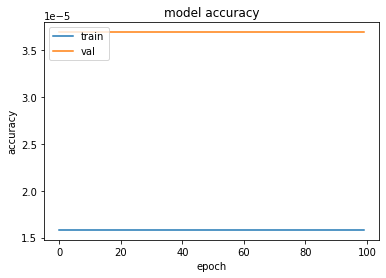

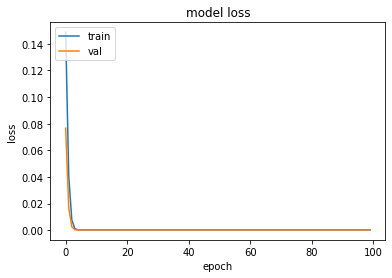

In [ ]:
build_model(df_train,df_val,1,'relu','adam',100,'mean_squared_error')

Boosting Algos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
import datetime as dt
from sklearn import preprocessing

data16 = pd.read_csv(
    "../data/train_2016_v2.csv", parse_dates=["transactiondate"], low_memory=False
)

prop16 = pd.read_csv("../data/properties_2016.csv", low_memory=False)

data17 = pd.read_csv(
    "../data/train_2017.csv", parse_dates=["transactiondate"], low_memory=False
)

prop17 = pd.read_csv("../data/properties_2017.csv", low_memory=False)

data16["transaction_year"] = data16["transactiondate"].dt.year
data16["transaction_month"] = data16["transactiondate"].dt.month
data16["transaction_day"] = data16["transactiondate"].dt.day
data16.drop(["transactiondate"], inplace=True, axis=1)

data17["transaction_year"] = data17["transactiondate"].dt.year
data17["transaction_month"] = data17["transactiondate"].dt.month
data17["transaction_day"] = data17["transactiondate"].dt.day
data17.drop(["transactiondate"], inplace=True, axis=1)
prop16.fillna(0, inplace=True)
prop17.fillna(0, inplace=True)

train2016 = pd.merge(data16, prop16, how="left", on="parcelid")
train2017 = pd.merge(data17, prop17, how="left", on="parcelid")
template = pd.read_csv("../data/sample_submission.csv", low_memory=False)

train_df = pd.concat([train2016, train2017], axis=0)
test_df = pd.merge(
    template[["ParcelId"]],
    prop16.rename(columns={"parcelid": "ParcelId"}),
    how="left",
    on="ParcelId",
)
for feature in train_df.columns:
    if train_df[feature].dtype == "object":
        label = preprocessing.LabelEncoder()
        label.fit(list(train_df[feature].values))
        train_df[feature] = label.transform(list(train_df[feature].values))

dftrain = train_df
xtrain = dftrain.drop(
    ["parcelid", "logerror", "propertyzoningdesc", "propertycountylandusecode"], axis=1
)
ytrain = dftrain["logerror"].values

test_df["transactiondate"] = pd.Timestamp("2016-12-01")
test_df["transaction_year"] = test_df["transactiondate"].dt.year
test_df["transaction_month"] = test_df["transactiondate"].dt.month
test_df["transaction_day"] = test_df["transactiondate"].dt.day
test_df.drop(["transactiondate"], inplace=True, axis=1)

for feature in test_df.columns:
    if test_df[feature].dtype == "object":
        label = preprocessing.LabelEncoder()
        label.fit(list(test_df[feature].values))
        test_df[feature] = label.transform(list(test_df[feature].values))
temp = []
for col in xtrain.columns:
    temp.append(col)

regressor = AdaBoostRegressor()
regressor.fit(xtrain, ytrain)
xtest = test_df[temp]
y_pred = regressor.predict(xtest)

submission = pd.DataFrame(
    {
        "ParcelId": test_df["ParcelId"],
    }
)
test_dates = {
    "201610": pd.Timestamp("2016-09-30"),
    "201611": pd.Timestamp("2016-10-31"),
    "201612": pd.Timestamp("2016-11-30"),
    "201710": pd.Timestamp("2017-09-30"),
    "201711": pd.Timestamp("2017-10-31"),
    "201712": pd.Timestamp("2017-11-30"),
}
for label, test_date in test_dates.items():
    submission[label] = y_pred

submission.to_csv("AdaBoost.csv", float_format="%.5f", index=False)


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

properties = pd.read_csv("../data/properties_2016.csv", low_memory=False)
train = pd.read_csv("../data/train_2016_v2.csv", low_memory=False)
cat_cols = []
for col in properties.columns:
    if properties[col].dtype == object:
        cat_cols.append(col)
ids = [
    "airconditioningtypeid",
    "architecturalstyletypeid",
    "buildingclasstypeid",
    "decktypeid",
    "heatingorsystemtypeid",
    "pooltypeid10",
    "pooltypeid2",
    "pooltypeid7",
    "propertylandusetypeid",
    "yearbuilt",
    "assessmentyear",
    "taxdelinquencyyear",
    "regionidcity",
    "regionidcounty",
    "regionidneighborhood",
    "regionidzip",
    "storytypeid",
    "typeconstructiontypeid",
]
for col in ids:
    properties[col] = properties[col].astype(str)
all_ids = ids + cat_cols
drop_cols = []
for col in all_ids:
    if len(properties[col].unique()) > 200:
        drop_cols.append(col)
for col in drop_cols:
    all_ids.remove(col)
properties = properties.drop(drop_cols, axis=1)
properties[all_ids] = properties[all_ids].fillna("None")
properties = pd.get_dummies(properties)
train = train.drop(["transactiondate"], axis=1)
np.where(properties.duplicated(subset="parcelid"))
duplicated_train = np.where(train.duplicated(subset="parcelid", keep=False))
train.iloc[duplicated_train].sort_values(by="parcelid").head()
train = train.drop_duplicates(subset="parcelid", keep="first")
data = pd.merge(properties, train, how="left", on=["parcelid"])

df_train = data.iloc[np.where(data["logerror"].notnull())]
df_test = data.iloc[np.where(data["logerror"].isnull())]

X_train = df_train.drop(["parcelid", "logerror"], axis=1).copy()
y_train = df_train["logerror"]
X_test = df_test.drop(["parcelid", "logerror"], axis=1).copy()

xgb_params = {
    "eta": 0.037,
    "max_depth": 5,
    "subsample": 0.80,
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "lambda": 0.8,
    "alpha": 0.4,
    "verbosity": 0,
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

num_boost_rounds = 242
model = xgb.train(
    dict(xgb_params, verbosity=0), dtrain, num_boost_round=num_boost_rounds
)

xgb_pred = model.predict(dtest)
X_test["logerror"] = xgb_pred
np.where(data["logerror"].isnull())[0]
data.loc[np.where(data["logerror"].isnull())[0], "logerror"] = xgb_pred
submission = pd.read_csv("../data/sample_submission.csv")
output_cols = submission.columns.tolist()
output_cols.remove("ParcelId")

for col in output_cols:
    submission[col] = data["logerror"]
submission.to_csv("xgboost.csv", index=False)
